<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3 <br>
American Sign Language Image Classification
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
<br>
<font size=3 color=grey>
Author: Sayeh Jarollahi
</font>
                <br/>
    </div>

In [2]:
# Set your student number
student_number = 99104627
Name = 'Shahed'
Last_Name = 'Razavi'

در این تمرین با کمک و همفکری آقایان محمدامین رییسی و مهدی قائم پناه تمرین را کامل کرده ام.

In this question, you will train a neural network for classifying sign language images. The American  Sign Language (ASL) dataset consists of 2515 images from different numbers and alphabets. The images are in RGB format and are not the same size. The dataset is classified into 36 classes (10 numbers and 26 alphabets). 

You will need to train a model to classify this dataset into different categories. You are allowed to use MLP as well as CNN networks. 

**Grading Policy:** For a full mark on this assignment, your notebook should be completely runnable by the TA. Additionally, you must reach an accuracy of %96 on the test data.

It is highly recommended to use google colab and utilize its GPUs. However, if you want to run the notebook locally, you can reach and download the dataset in this [link](https://drive.google.com/file/d/11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5/view?usp=share_link).



## Setup


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os

from PIL import Image
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
import torch.nn.functional as F
from q1_helper_code import get_files

#########################################
#                                       #
#  import other necessery packages here #
#                                       #
#########################################

In [4]:
# NOTE: It is highly recommended to use colab GPUs!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Download and unzip the dataset


In [5]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11_4-N8EdtoLPiW3YyJ840CXM0FckO1e5" -O asl_dataset.zip && rm -rf /tmp/cookies.txt
! unzip asl_dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: asl_dataset/0/hand2_0_dif_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_dif_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_left_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0_right_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand2_0

In [6]:
main_dir = "asl_dataset/asl_dataset"
class_dirs = os.listdir(main_dir)

## Transform 

Data transformation is the process of converting data from one format or structure into another format or structure. Transformers change pixel values but still keep almost the whole information of the image.[source](https://towardsdatascience.com/improves-cnn-performance-by-applying-data-transformation-bf86b3f4cef4) You can read more about them in the mentioned source. 

You are going to implement two different transformers from scratch. These transformers will be used once the data is loaded. 

### Resize 
This transformer recieves a tensor (3\*x\*y) and returns a tensor with shape (3\*size\*size)

In [7]:
class Resize(object):
    
    def __init__(self, size=50):
      self.size = size
    #############################
    #       Code here           #
    #############################
    
  
    def __call__(self, x):
      disx = x.shape[1]/self.size
      disy = x.shape[2]/self.size
      new = torch.zeros(3,self.size,self.size,dtype = torch.float)
      for i in range(3):
        for j in range(self.size):
          for k in range(self.size):
            new[i,j,k] = x[i,int(j*disx),int(k*disy)]
      return new
      # f = transforms.Resize(self.size)
      # return f(x)
    #############################
    #       Code here           #
    #############################

### GrayScale
This transform is helpful to decrease the number of channels, so the training gets faster. 

Feel free to add args to functions or change them if you need to!

In [8]:
class GrayScale(object):

    def __init__(self):
    #############################
    #       Code here           #
    #############################
        pass

    def __call__(self, x):
      x = (x[0]+x[1]+x[2])/3
      return x
    #############################
    #       Code here           #
    #############################

## Load Data and compose transforms 
You can combine Transforms using the **compose** method in the torchvision.transforms library.

In [9]:
# Ddd the implemented transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    Resize(),
    GrayScale()
])

Plot one random sample from each class of the datset:

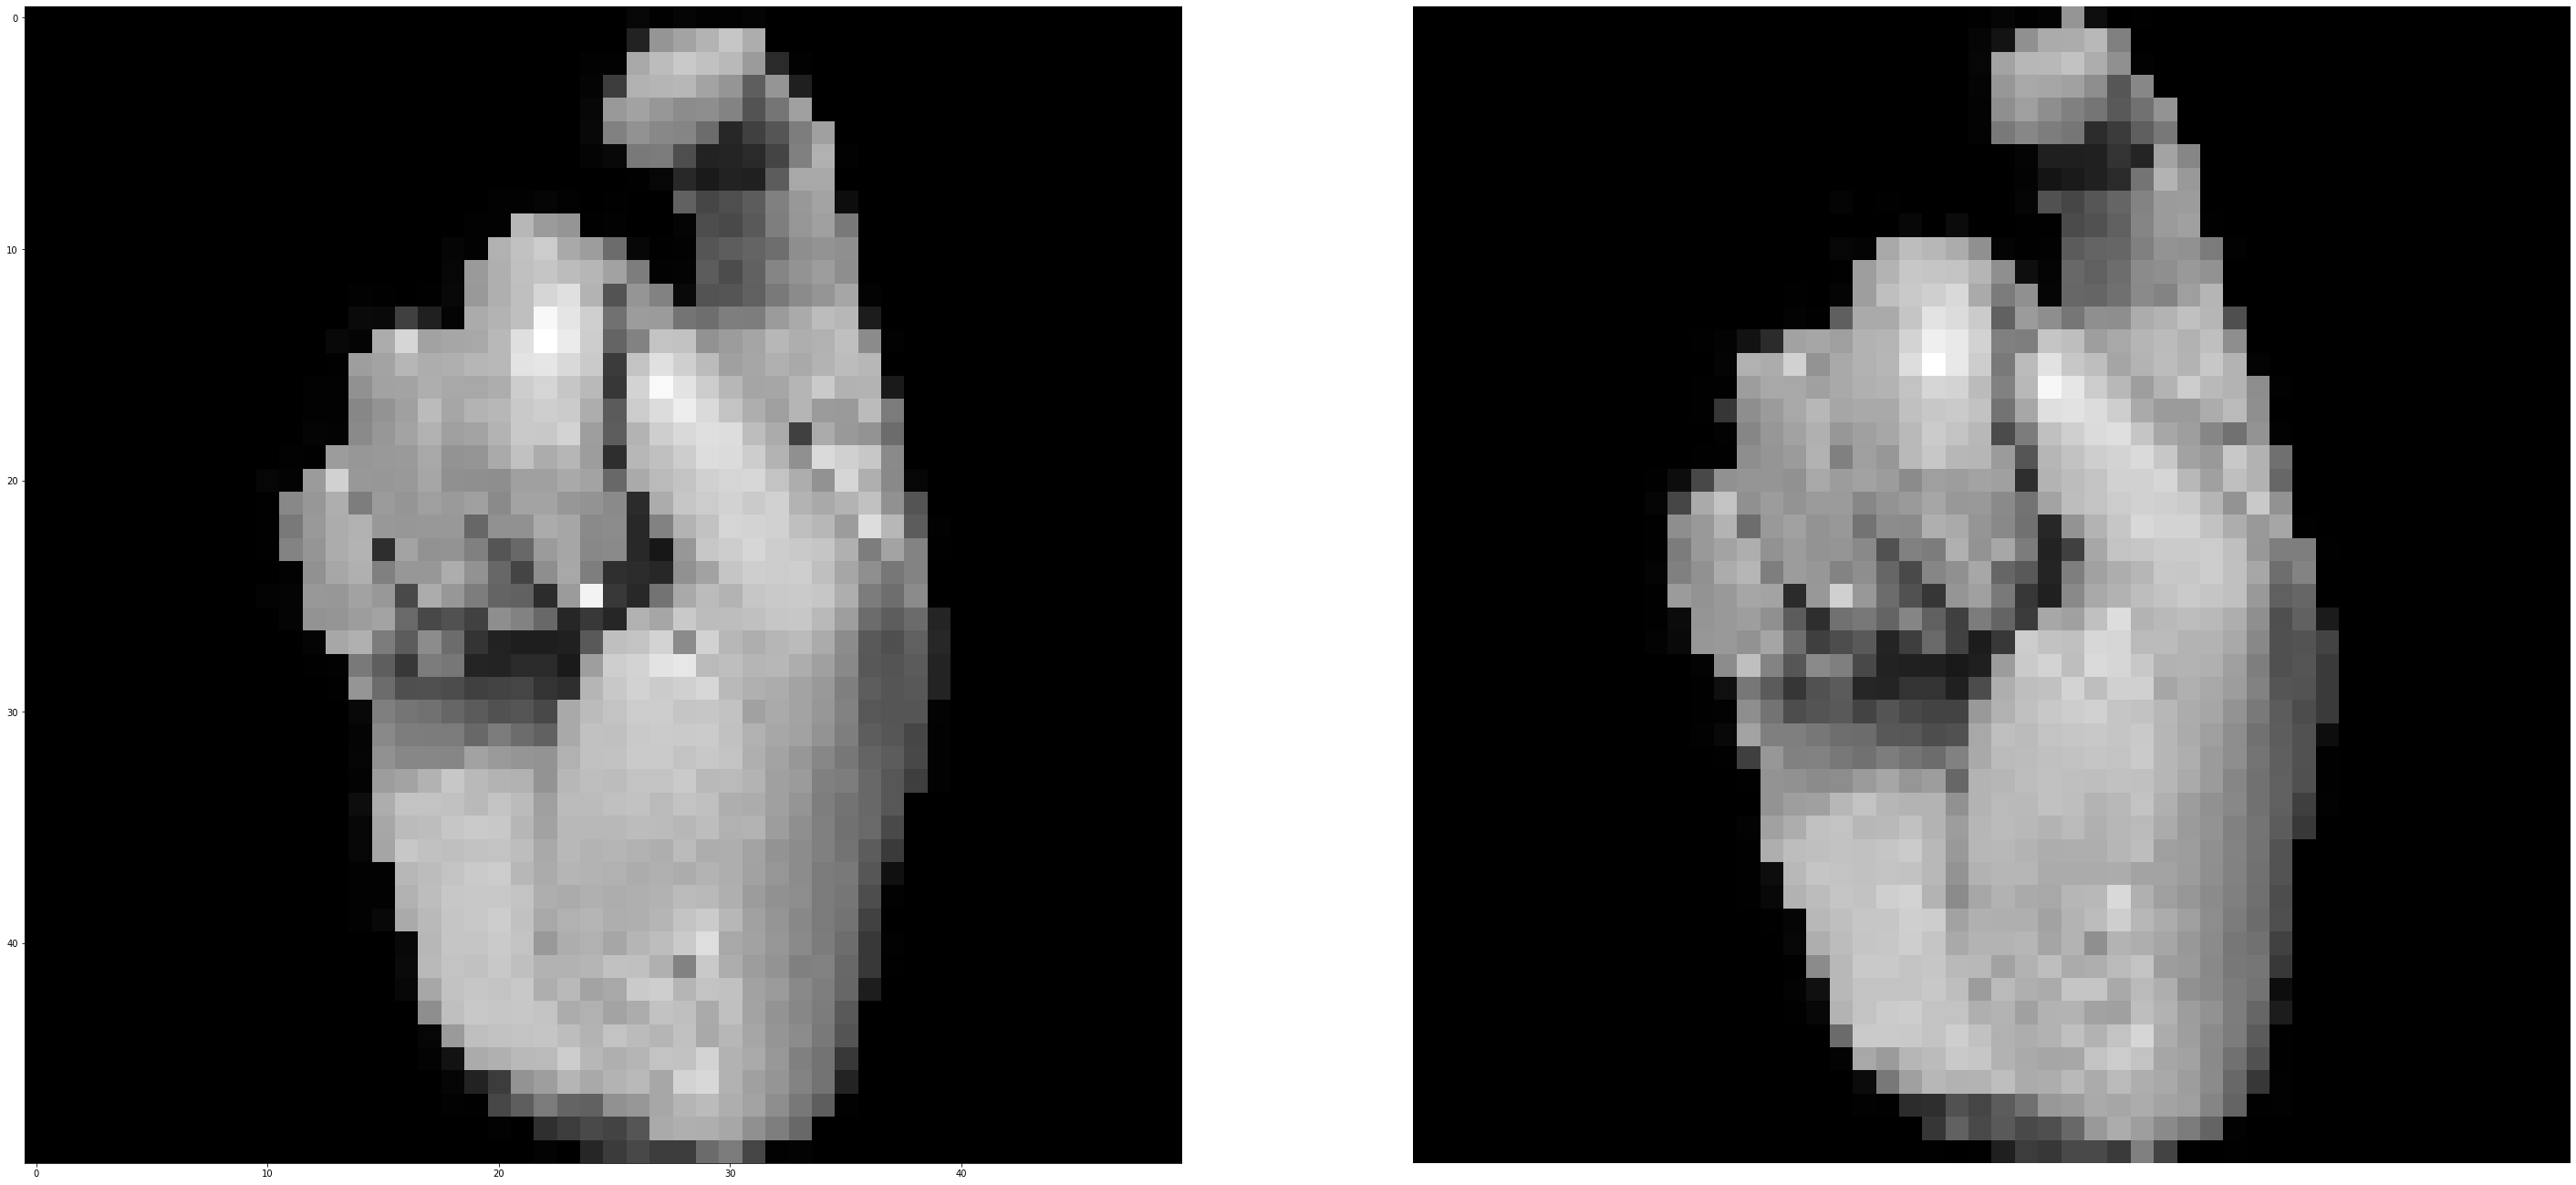

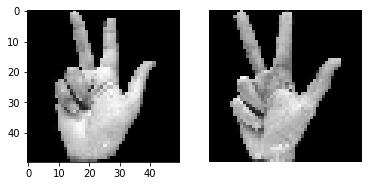

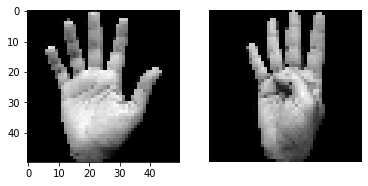

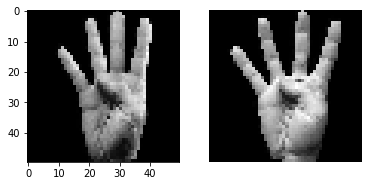

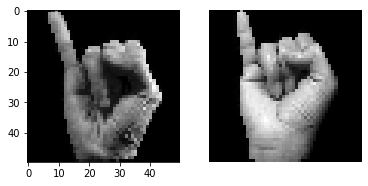

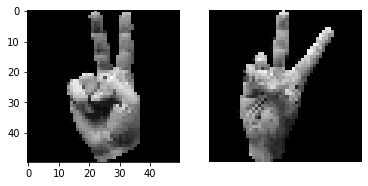

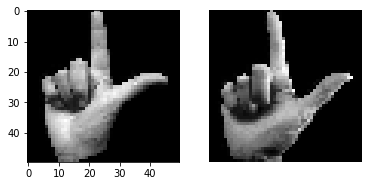

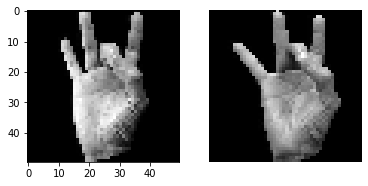

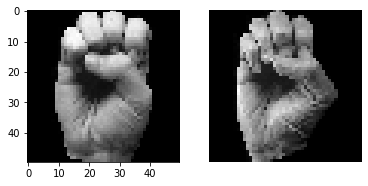

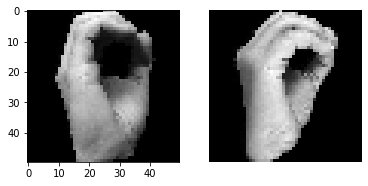

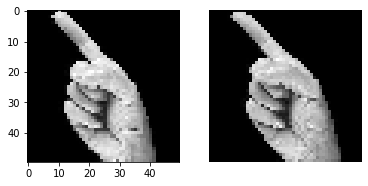

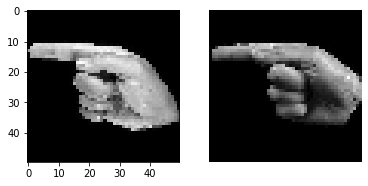

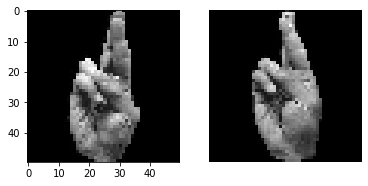

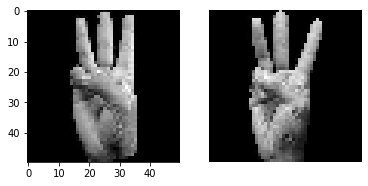

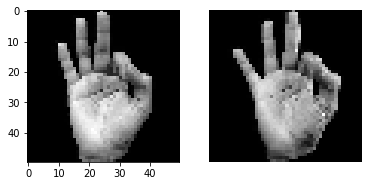

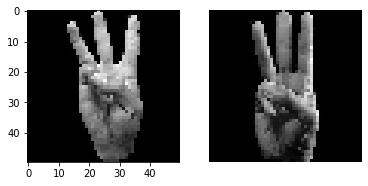

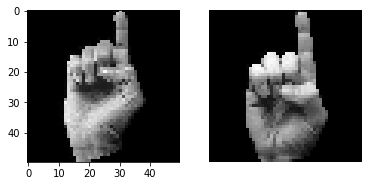

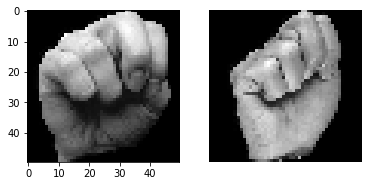

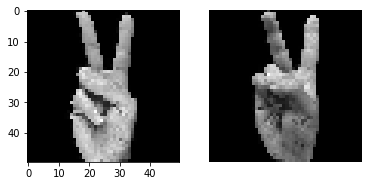

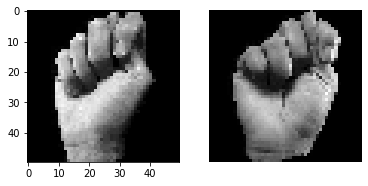

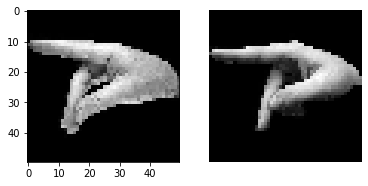

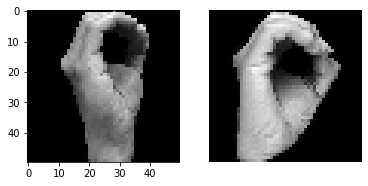

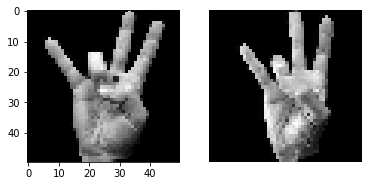

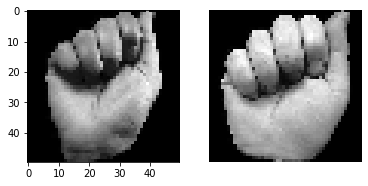

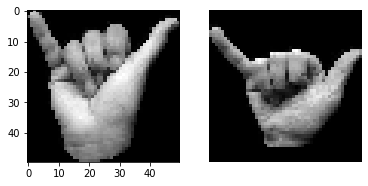

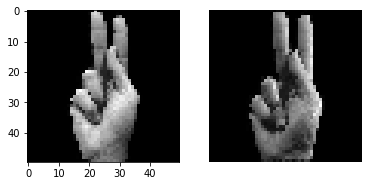

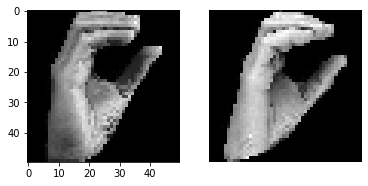

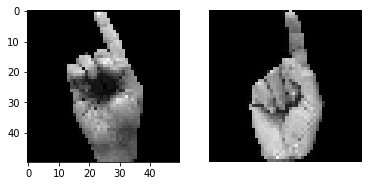

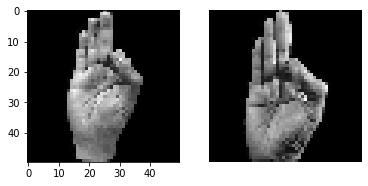

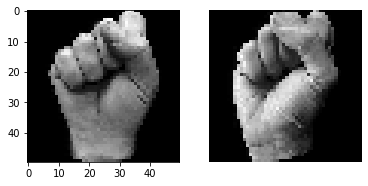

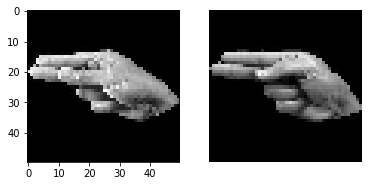

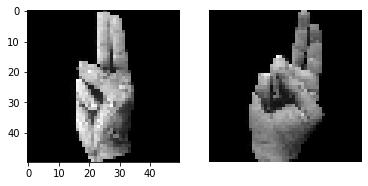

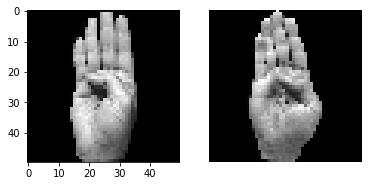

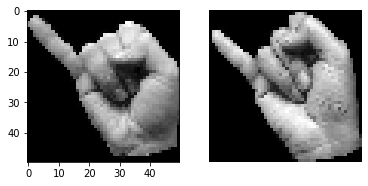

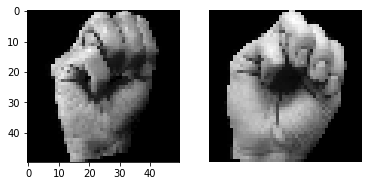

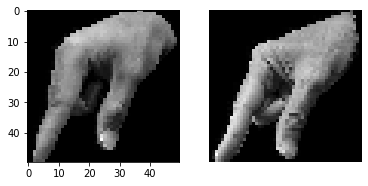

In [10]:
'''
Hint:
Get two random samples from files in each directory and use subplot to add those
images to the plot. 
Use previously defined transform to test your transforms
'''
plt.figure(figsize=(50,50))
j = 0
for i, directory in enumerate(class_dirs):
    # name of all files in the directory
    files_name = os.listdir(f"{main_dir}/{directory}")
    a = np.random.randint(0,len(files_name),size=2)
    plt.subplot(1,2,1)
    img1 = transform(Image.open(os.path.join(f"{main_dir}/{directory}", files_name[a[0]])))
    plt.imshow(img1, cmap = 'gray')
    plt.subplot(1,2,2)
    img2 = transform(Image.open(os.path.join(f"{main_dir}/{directory}", files_name[a[1]])))
    plt.imshow(img2, cmap = 'gray')
    plt.axis('off')
    plt.show()


    
    #############################
    #         Code here         #
    #############################


## Create Dataset 
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. [from [Pytorch Documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)] 

In this section, you will implement a custom dataset which gets address of files and loads them as needed. 

In [11]:
class ASLDataset(Dataset):
    def __init__(self, files_address:list, transform=transform):
      self.files_address = files_address
      self.transform = transform
        #############################
        #         Code here         #
        #############################

    def __len__(self):
      return(len(self.files_address))
        # returns length of the data

        #############################
        #         Code here         #
        #############################

    def __getitem__(self, idx):
        # Hint: load image from files_address and the label from name of the directory 
        # Remember to apply transforms!
        image = None
        label = None

        address = self.files_address[idx]
        image = transform(Image.open(address)).view(1,50,50)
        label = address.split("/")[2]
        label = int(label) if label.isdigit() else (ord(label) - 87)
        #############################
        #         Code here         #
        #############################
        return image, label

In [12]:
files_addr, labels = get_files()
print(len(labels), len(files_addr))

2515 2515


## Create Datasets  

First split data to train, validation and test using the `train_test_split funciton`. Remember to shuffle data. Then create ASLDataset for each part of data. 

In [13]:
#############################
#         Code here         #
#############################
x_train, x_test, y_train, y_test = train_test_split(files_addr, labels, test_size = 0.2 , shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2 , shuffle=True)
train_dataset = ASLDataset(x_train, transform)
val_dataset = ASLDataset(x_val, transform)
test_dataset = ASLDataset(x_test, transform)

Use datasets to create DataLoader from `torch.utils.DataLoader` class

Note: You should make `shuffle=True` for the training dataLoader, so in each epoch the data reshuffles. 

In [14]:
num_threads = 2

#############################
#         Code here         #
#############################

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 64, shuffle=True, num_workers=num_threads)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= 64, shuffle=True, num_workers=num_threads)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 64, shuffle=True, num_workers=num_threads)

## Define Model 

In [22]:
class ASLModel(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, 8, 6) #8, 45, 45
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 =  nn.Conv2d(8, 18, 6) #18, 40, 40
        self.bn2 =  nn.BatchNorm2d(18)
        
        self.pool = nn.MaxPool2d(2,2) #18, 20, 20
        
        self.conv3 = nn.Conv2d(18, 38, 6) #38, 15, 15
        self.bn3 = nn.BatchNorm2d(38)

        self.conv4 = nn.Conv2d(38, 64, 10) #64, 6, 6
        self.bn4 = nn.BatchNorm2d(64)


        self.fc = nn.Linear(64*6*6, num_classes)
            
        
    def forward(self, input):
        out = torch.nn.functional.relu(self.bn1(self.conv1(input)))      
        out = torch.nn.functional.relu(self.bn2(self.conv2(out)))     
        out = self.pool(out)                       
        out = torch.nn.functional.relu(self.bn3(self.conv3(out)))
        out = torch.nn.functional.relu(self.bn4(self.conv4(out)))         
        out = out.view(-1, 64*6*6)
        out = self.fc(out)
        return out


In [23]:
in_channels = 1 
num_classes = 36
model = ASLModel(in_channels, num_classes).to(device)

## Define optimizer, Criterion and other parameters 


In [24]:
#############################
#         Code here         #
#############################
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
# Set parameters and hyper parameters
batch_size = 64
learning_rate = 0.001
input_size = None 

In [26]:
best_model = None
best_acc = 0

def train_val (model, trainloader, val_loader, f_loss, optimizer, n_epochs, device = device):
    global best_model, best_acc
    train_loss_arr, val_loss_arr = [], []
    train_acc_arr, val_acc_arr = [], []  
    for epoch in range(n_epochs):
        train_loss, val_loss = 0, 0
        train_acc_num, val_acc_num = 0, 0
        model.train()

        #############################
        #         Code here         #
        #############################
        ## Hint: Loop throught train_loader, get images with their labels and train the model
        ## Hint 2: To update train_loss inside the loop use "train_loss += batch_loss * batch_size""
        ## Hint 3: To update train_acc get the predicted label of each training data and compare with the real label
        for i, (images, labels) in enumerate(trainloader):
          labels = np.asarray(labels)
          labels = torch.from_numpy(labels)
          labels = labels.to(device)


          optimizer.zero_grad()
          images = images.to(device)
          out = model(images)
          predictions = out.argmax(-1)
          loss = f_loss(out,labels)
          loss.backward()
          # print(loss)

          optimizer.step()
          
          train_loss += batch_size * loss
          train_acc_num += (predictions== labels).sum()
        

        
    
    
        model.eval()
        #############################
        #         Code here         #
        #############################
        ## Hint: Loop throught val_loader, get images with their labels and evaluate the model
        ## Hint 2: To update val_loss inside the loop use "val_loss += batch_loss * batch_size""
        ## Hint 3: you have to keep the best model in the best_model variable to use it in the testing phase

        with torch.no_grad():
          for i, (images, labels) in enumerate(val_loader):
            labels = np.asarray(labels)
            labels = torch.from_numpy(labels)
            labels = labels.to(device)


            images = images.to(device)
            out = model(images)
            predictions = out.argmax(-1)
            loss = f_loss(out, labels)
            val_loss += batch_size * loss
            val_acc_num += (predictions== labels).sum()
        
        val_acc = val_acc_num / len(val_loader.dataset) * 100
        train_acc = train_acc_num / len(trainloader.dataset) * 100

        val_acc_arr.append(val_acc)
        train_acc_arr.append(train_acc)



        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)
        train_loss_arr.append(train_loss)
        val_loss_arr.append(val_loss)
        #############################
        #         Code here         #
        #############################
        # append accuracy of train and valid to the lists

        print(f"[Epoch {epoch}]\t"
            f"Train Loss: {train_loss:.3f}\t"
            f"Validation Loss: {val_loss:.3f}")
        
        if (best_acc < val_acc_arr[-1]):
          best_model = model
          best_acc = val_acc_arr[-1]

    return train_loss_arr, val_loss_arr, train_acc_arr, val_acc_arr

In [27]:
# Call the train_val function
train_loss_arr, val_loss_arr, train_acc_arr, val_acc_arr = train_val(model, train_loader, val_loader, loss, optimizer,8)

[Epoch 0]	Train Loss: 1.396	Validation Loss: 4.117
[Epoch 1]	Train Loss: 0.265	Validation Loss: 0.525
[Epoch 2]	Train Loss: 0.109	Validation Loss: 0.274
[Epoch 3]	Train Loss: 0.057	Validation Loss: 0.200
[Epoch 4]	Train Loss: 0.021	Validation Loss: 0.159
[Epoch 5]	Train Loss: 0.011	Validation Loss: 0.140
[Epoch 6]	Train Loss: 0.006	Validation Loss: 0.142
[Epoch 7]	Train Loss: 0.005	Validation Loss: 0.145


## Plot loss and accuracy

You must have one plot for loss according to epoch for train/val.

Also, another plot for accuracy according to epoch for train/val

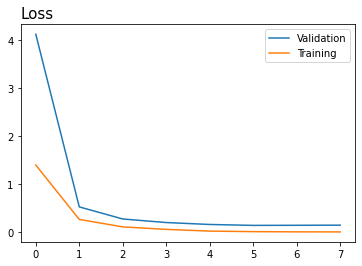

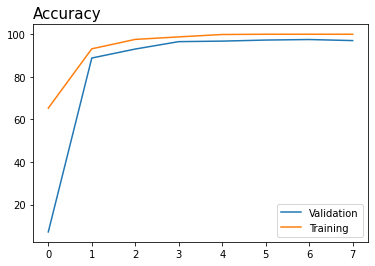

In [28]:
#############################
#         Code here         #
#############################
l = [i for i in range (8)] 
plt.plot(l,list(torch.tensor(val_loss_arr)),label="Validation")
plt.plot(l,list(torch.tensor(train_loss_arr)),label="Training")
plt.title("Loss", fontsize=15, loc='left')
plt.legend()
plt.show()


plt.plot(l,list(torch.tensor(val_acc_arr)),label="Validation")
plt.plot(l,list(torch.tensor(train_acc_arr)),label="Training")
plt.title("Accuracy", fontsize=15, loc='left')
plt.legend()
plt.show()

## Evaluate model on the test dataset

Evaluate your best model on the test dataset. You should get accuracy above ***%96*** for a full-mark.

Remember to print the accuracy of model on the test dataset! 

In [29]:
#############################
#         Code here         #
#############################
best_model.eval()
num = 0
total = 0

for id, (images, labels) in enumerate(test_loader):
  images = images.to(device)
  labels = labels.to(device)
  out = best_model(images)
  predictions = out.argmax(-1)

  num += (predictions == labels).sum()
  total += predictions.shape[0]


print(f"accuracy of model: {float(num/total *100)}")

accuracy of model: 96.62026977539062
